## Perceptron

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pla = Perceptron()
pla.fit(X_train, y_train)

Perceptron()

In [3]:
y_pred = pla.predict(X_test)
accuracy_score(y_pred, y_test)

0.6

## Multi Layer Perceptron

### Regression task

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
 housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = Pipeline([('standardize', StandardScaler()), ('regressor', mlp_reg)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
rmse

0.5053326657968739

### Classification task

In [213]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

## Keras

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
X_train.shape

(55000, 28, 28)

In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

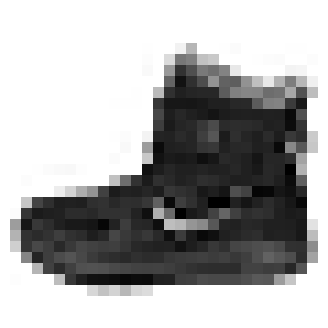

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Ankle boot'

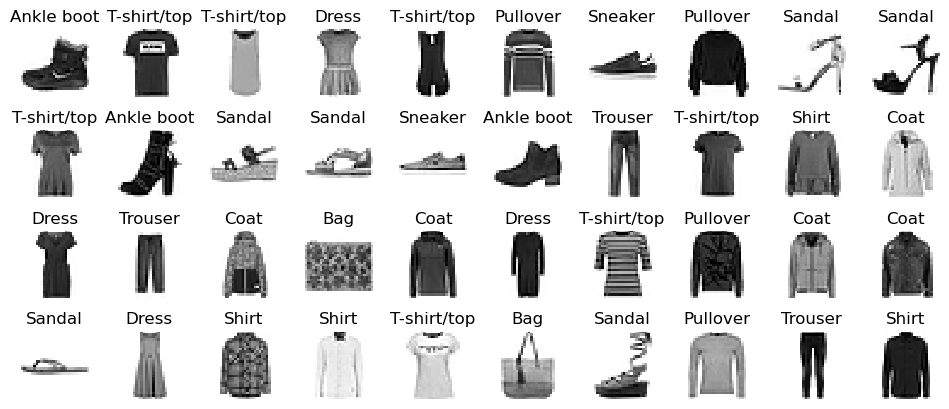

In [16]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Creating model

In [19]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9233 - loss: 0.2183 - val_accuracy: 0.8764 - val_loss: 0.3410
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.2145 - val_accuracy: 0.8782 - val_loss: 0.3400
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9262 - loss: 0.2110 - val_accuracy: 0.8776 - val_loss: 0.3405
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9279 - loss: 0.2074 - val_accuracy: 0.8760 - val_loss: 0.3417
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9292 - loss: 0.2041 - val_accuracy: 0.8778 - val_loss: 0.3397
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9308 - loss: 0.2004 - val_accuracy: 0.8788 - val_loss: 0.3415
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9322 - loss: 0.1972 - val_accuracy: 0.8788 - val_loss: 0.3428
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9337 - loss: 0.1937 - 

KeyboardInterrupt: 

In [25]:
import pandas as pd

pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.769836,0.705554,0.8326,0.498323
1,0.833455,0.481301,0.8438,0.446788
2,0.847745,0.436928,0.8480,0.423436
3,0.856691,0.410236,0.8544,0.408726
4,0.862491,0.390696,0.8584,0.397820
5,0.867618,0.374972,0.8604,0.389731
6,0.871745,0.361857,0.8616,0.382960
7,0.875727,0.350304,0.8636,0.377044
8,0.878964,0.339920,0.8652,0.372586
9,0.881800,0.330625,0.8676,0.367323


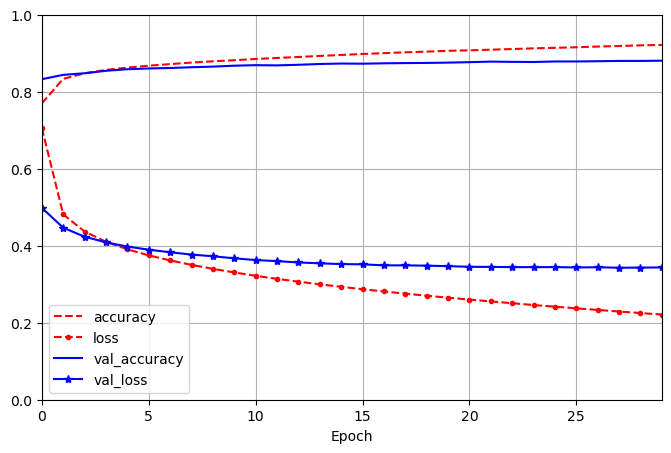

In [26]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8799 - loss: 0.3550


[0.35538339614868164, 0.8784999847412109]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.01, 0.  , 0.81],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

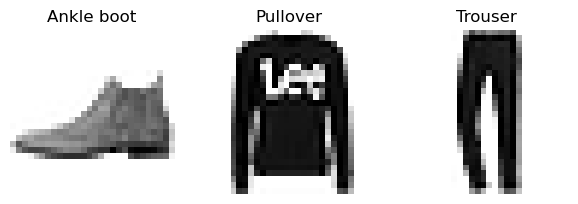

In [31]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Regression model

In [33]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [34]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.2025 - loss: 1.5483 - val_RootMeanSquaredError: 0.6518 - val_loss: 0.4248
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - RootMeanSquaredError: 0.6309 - loss: 0.3983 - val_RootMeanSquaredError: 1.0400 - val_loss: 1.0816
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - RootMeanSquaredError: 0.6076 - loss: 0.3694 - val_RootMeanSquaredError: 1.1882 - val_loss: 1.4119
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - RootMeanSquaredError: 0.5956 - loss: 0.3549 - val_RootMeanSquaredError: 1.5969 - val_loss: 2.5501
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - RootMeanSquaredError: 0.5864 - loss: 0.3440 - val_RootMeanSquaredError: 1.1742 - val_loss: 1.3787
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - RootMeanSquaredError: 0.5719 - loss: 0.3271 - val_RootMeanSquaredError: 0.7886 - val_loss: 0.6220
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - RootMeanSquaredError: 0.5628 - lo

In [35]:
mse_test, rmse_test

(0.2829906642436981, 0.5319686532020569)

In [36]:
y_pred

array([[0.44091153],
       [1.1029733 ],
       [4.6467566 ]], dtype=float32)

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

In [137]:
tf.keras.backend.clear_session()

In [232]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [141]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [438]:
optimizer = tf.keras.optimizers.Adam(learning_rate=10e-3)
model.compile(optimizer, metrics = ['accuracy'], loss = tf.keras.losses.SparseCategoricalCrossentropy)

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1011 - loss: 2.3091 - val_accuracy: 0.0999 - val_loss: 2.3054
Epoch 2/20
280/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1064 - loss: 2.2999

<Figure size 2000x400 with 0 Axes>

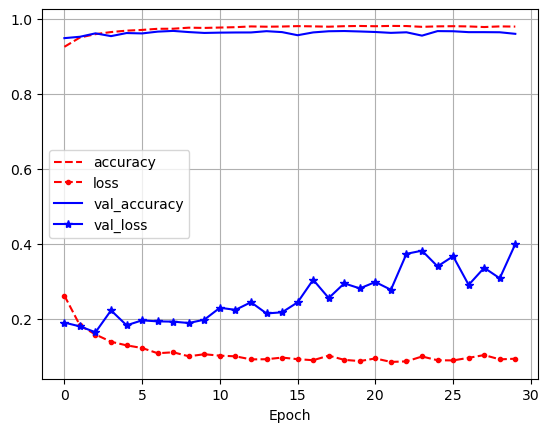

In [347]:
plt.figure(figsize=(20, 4))
pd.DataFrame(history.history).plot(grid = True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc = 'center left')

In [349]:
X_new = X_train[:10]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [290]:
y_new = y_train[:10]
y_new

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [292]:
class_name = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

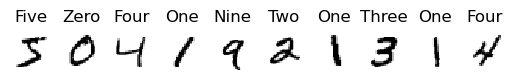

In [294]:
ncols = 10
for idx in range(ncols):
    plt.subplot(1, n_cols, idx + 1)
    plt.imshow(X_new[idx], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.show()

In [306]:
np.argmax(model.predict(X_test[:10]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

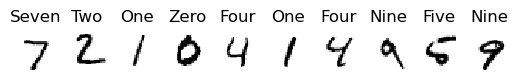

In [310]:
ncols = 10
for idx in range(ncols):
    plt.subplot(1, n_cols, idx + 1)
    plt.imshow(X_test[idx], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_name[y_test[idx]])
plt.show()

In [418]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, y_train = X_train[:20000], y_train[:20000]

In [419]:
X_train.shape

(20000, 32, 32, 3)

In [422]:
model = tf.keras.Sequential()

In [424]:
model.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [426]:
model.compile(optimizer = tf.keras.optimizers.Adam(10e-3), metrics = ['accuracy'], loss = tf.keras.losses.sparse_categorical_crossentropy)

In [428]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 50)             │       360,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,786 (1.38 MB)

 Trainable params: 362,786 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [436]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1039 - loss: 2.3015 - val_accuracy: 0.1009 - val_loss: 2.3050
Epoch 2/10
204/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1060 - loss: 2.3000

KeyboardInterrupt: 